In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import random
import timeit
from scipy.spatial import distance as dst
import itertools
import pickle
import scipy.stats as stats
from scipy.stats import linregress
name_list = ['root_1','root_2','human_neuron','zebrafish_neuron','monkey_neuron',
                'rat_neuron','anthill','vascular_1','vascular_2','vascular_3',
                'mitochondrial','fruit_fly_1','fruit_fly_2','fruit_fly_3','fruit_fly_4']
color_dict = {'root_1':'green','root_2':'olive','mitochondrial':'y','vascular_1':'red','vascular_2':'crimson','vascular_3':'salmon',
              'fruit_fly_2':'purple','fruit_fly_3':'pink','tree':'brown','rat_neuron':'lightblue','human_neuron':'blue',
              'anthill':'silver','fruit_fly_1':'deeppink','fruit_fly_4':'plum','zebrafish_neuron':'cyan','monkey_neuron':'teal'}
category_color_dict = {'root_1':'green','root_2':'green','mitochondrial':'blue','vascular_1':'b','vascular_2':'blue','vascular_3':'blue',
              'fruit_fly_2':'red','fruit_fly_3':'red','tree':'green','rat_neuron':'green','human_neuron':'green',
              'anthill':'green','fruit_fly_1':'red','fruit_fly_4':'red','zebrafish_neuron':'green','monkey_neuron':'green'}
name_change_dict = {'mitochondrial':'mitochon','human_neuron':'h_neuron','monkey_neuron':'m_neuron','rat_neuron':'r_neuron','zebrafish_neuron':'z_neuron'}
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

def bounding_box_from_merged_skeleton(merged_skeleton_dataset):
    x_min = np.min([np.min(merged_skeleton_dataset['x_1']),np.min(merged_skeleton_dataset['x_2'])])
    x_max = np.max([np.max(merged_skeleton_dataset['x_1']),np.max(merged_skeleton_dataset['x_2'])])

    y_min = np.min([np.min(merged_skeleton_dataset['y_1']),np.min(merged_skeleton_dataset['y_2'])])
    y_max = np.max([np.max(merged_skeleton_dataset['y_1']),np.max(merged_skeleton_dataset['y_2'])])

    z_min = np.min([np.min(merged_skeleton_dataset['z_1']),np.min(merged_skeleton_dataset['z_2'])])
    z_max = np.max([np.max(merged_skeleton_dataset['z_1']),np.max(merged_skeleton_dataset['z_2'])])

    return [x_min,x_max,y_min,y_max,z_min,z_max]

# Picking the bounding box

In [128]:
path = '../1. data/3. final_data/'
final_results ={}
for name in name_list:
    print(name)
    final_results[name] = {}
    skeleton_paths = pd.read_csv(path +  name+ '.paths.csv',index_col=[0])
    bounds = bounding_box_from_merged_skeleton(skeleton_paths)
    shortest_side = np.min([abs(bounds[0] - bounds[1]),abs(bounds[2] - bounds[3]),abs(bounds[4] - bounds[5])])
    cube_side =  shortest_side *0.32
    starting_proportion = 10
    if name == 'fruit_fly_3':
         starting_proportion = 5
    elif name == 'fruit_fly_1':
        starting_proportion = 5
    elif name == 'fruit_fly_2':
        starting_proportion = 5
    elif name == 'fruit_fly_4':
        starting_proportion = 5
    cube_side_list = [proportion / 100 * cube_side for proportion in np.arange(5, 105, 5)]
    print('Cube_sides',cube_side_list)
    for cube_side in cube_side_list:
        x_axis = np.arange(bounds[0],bounds[1]+cube_side,cube_side)
        y_axis = np.arange(bounds[2],bounds[3]+cube_side,cube_side)
        z_axis = np.arange(bounds[4],bounds[5]+cube_side,cube_side)
        number_of_cubes = len(x_axis) * len(y_axis) * len(z_axis)

root_1
Cube_sides [21.597502400000003, 43.19500480000001, 64.7925072, 86.39000960000001, 107.98751200000001, 129.5850144, 151.1825168, 172.78001920000003, 194.37752160000002, 215.97502400000002, 237.57252640000004, 259.1700288, 280.7675312, 302.3650336, 323.962536, 345.56003840000005, 367.15754080000005, 388.75504320000005, 410.35254560000004, 431.95004800000004]
root_2
Cube_sides [20.843245684800007, 41.68649136960001, 62.52973705440001, 83.37298273920003, 104.21622842400002, 125.05947410880002, 145.90271979360003, 166.74596547840005, 187.58921116320005, 208.43245684800004, 229.27570253280007, 250.11894821760004, 270.9621939024001, 291.80543958720006, 312.6486852720001, 333.4919309568001, 354.33517664160007, 375.1784223264001, 396.02166801120006, 416.8649136960001]
human_neuron
Cube_sides [3.1788800000000004, 6.357760000000001, 9.53664, 12.715520000000001, 15.894400000000001, 19.07328, 22.25216, 25.431040000000003, 28.609920000000002, 31.788800000000002, 34.96768, 38.14656, 41.32544, 

In [ ]:
fractal_dimension_dict = {}
r_dict = {}
std_error_dict = {}

# Create a figure with 3 rows and 5 columns
plt.figure(figsize=(25, 15))  # Adjust the size as needed

for i, name in enumerate(name_list):
    y = np.array(fractal_results[name]['filled_boxes_count_list'])
    x = np.array(fractal_results[name]['cube_side_list'])

    fractal_dimension = np.round(-linregress(np.log(x), np.log(y))[0], 2)
    fractal_dimension_dict[name] = fractal_dimension
    slope, intercept, r_value, p, se = linregress(np.log(x), np.log(y))  

    r_squared = r_value**2
    r_dict[name] = np.round(r_squared, 2)
    std_error_dict[name] = np.round(se, 2)

    # Use subplot to plot in the specified grid
    plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns, position i+1
    plt.scatter(np.log(x), np.log(y), label='box counting',s=30)
    plt.plot(np.log(x), intercept + slope * np.log(x), 'r', label='fit',lw=2)
    
    plt.ylabel(r'$\log(n_{b})$',fontsize=22)
    plt.xlabel(r'$\log(l_{b})$',fontsize=22)
    if name in name_change_dict:
        plt.title(name_change_dict[name])
    else:
        plt.title(name,fontsize=22)
    plt.legend(fontsize=18)

# Save the entire figure
plt.tight_layout()
plt.savefig('fractal_dimension_scatter.pdf', format='pdf', dpi=1200)

# Fractal Dimension


In [126]:
fractal_results = {}
for name in name_list:
    infile  = open('2. fractal_dimension_results/' + name + '_fractal_dimension_results.pkl','rb')
    fractal_results[name] = pickle.load(infile)

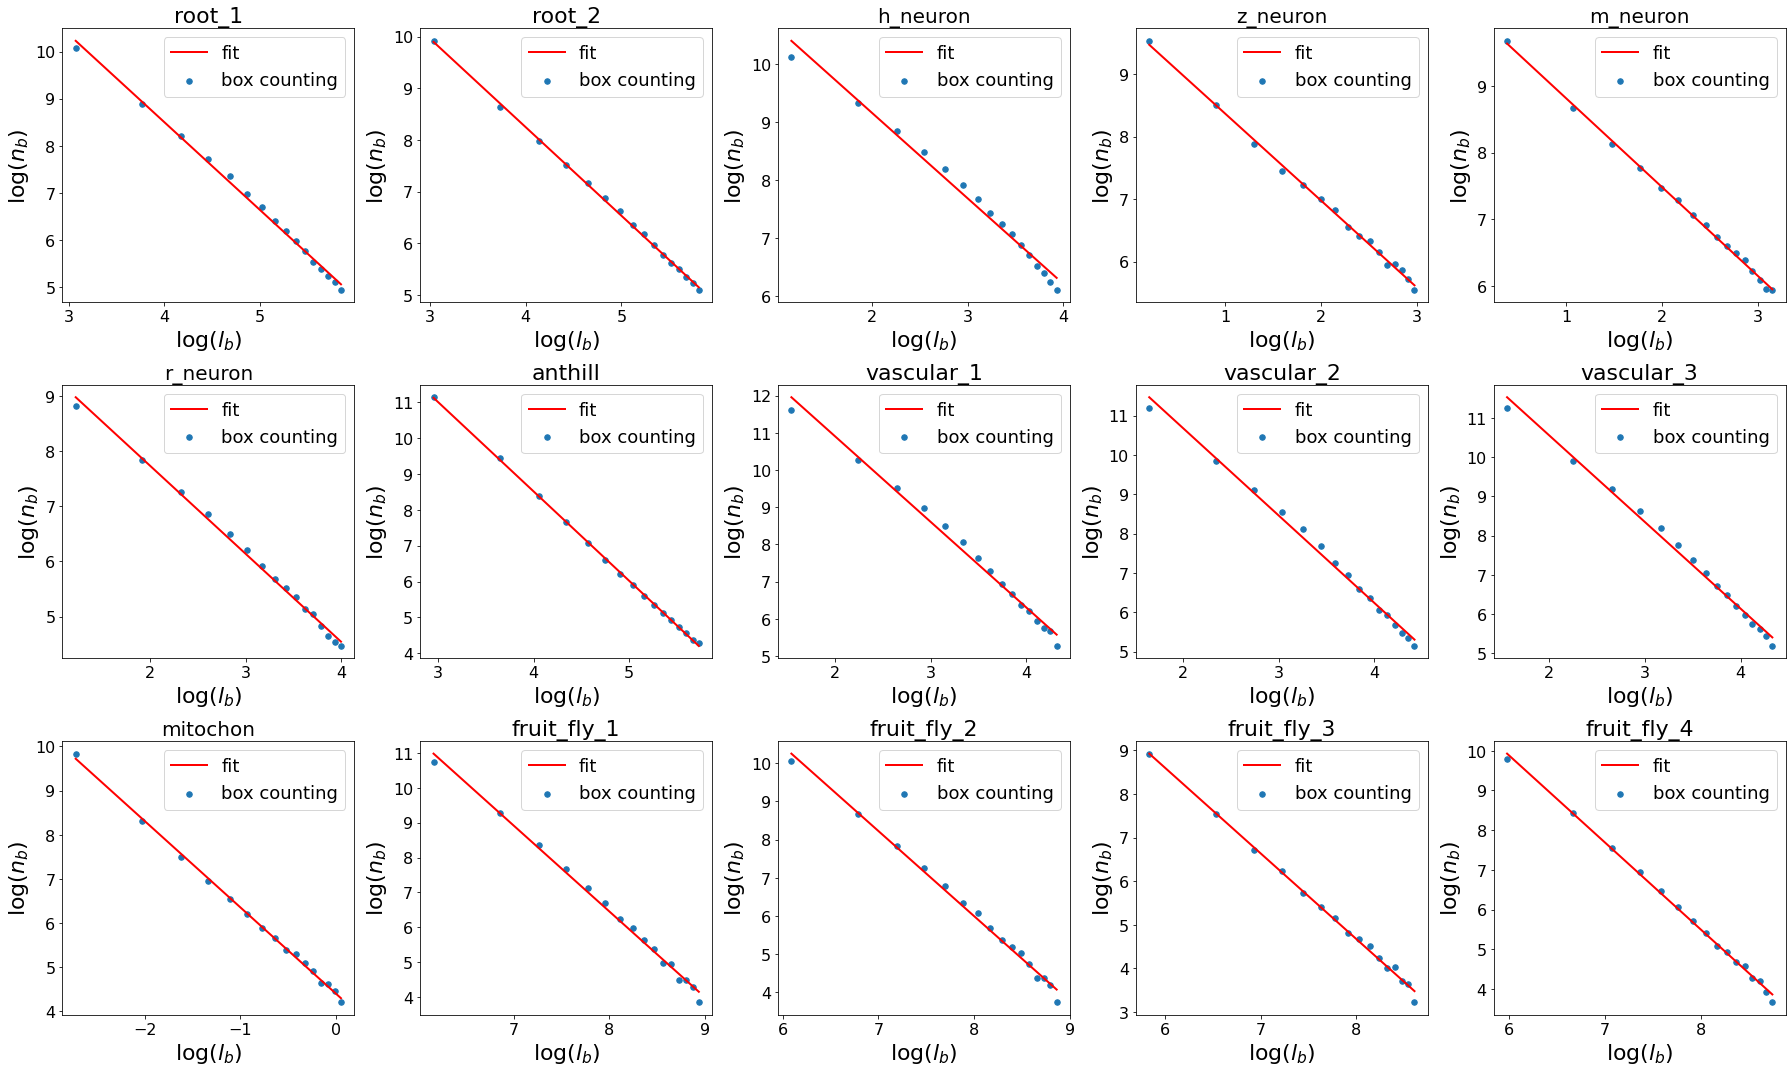

In [115]:
fractal_dimension_dict = {}
r_dict = {}
std_error_dict = {}

# Create a figure with 3 rows and 5 columns
plt.figure(figsize=(25, 15))  # Adjust the size as needed

for i, name in enumerate(name_list):
    y = np.array(fractal_results[name]['filled_boxes_count_list'])
    x = np.array(fractal_results[name]['cube_side_list'])

    fractal_dimension = np.round(-linregress(np.log(x), np.log(y))[0], 2)
    fractal_dimension_dict[name] = fractal_dimension
    slope, intercept, r_value, p, se = linregress(np.log(x), np.log(y))  

    r_squared = r_value**2
    r_dict[name] = np.round(r_squared, 2)
    std_error_dict[name] = np.round(se, 2)

    # Use subplot to plot in the specified grid
    plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns, position i+1
    plt.scatter(np.log(x), np.log(y), label='box counting',s=30)
    plt.plot(np.log(x), intercept + slope * np.log(x), 'r', label='fit',lw=2)
    
    plt.ylabel(r'$\log(n_{b})$',fontsize=22)
    plt.xlabel(r'$\log(l_{b})$',fontsize=22)
    if name in name_change_dict:
        plt.title(name_change_dict[name])
    else:
        plt.title(name,fontsize=22)
    plt.legend(fontsize=18)

# Save the entire figure
plt.tight_layout()
plt.savefig('fractal_dimension_scatter.pdf', format='pdf', dpi=1200)

In [117]:
df_dict = {'name':list(fractal_dimension_dict.keys()),'fractal_dimension': list(fractal_dimension_dict.values()),'r_squared':list(r_dict.values()),'std_error':list(std_error_dict.values())}
df = pd.DataFrame(df_dict)
df[['name','fractal_dimension','std_error']]

,name,fractal_dimension,std_error
0,root_1,1.86,0.03
1,root_2,1.72,0.01
2,human_neuron,1.47,0.05
3,zebrafish_neuron,1.39,0.02
4,monkey_neuron,1.33,0.01
5,rat_neuron,1.60,0.03
6,anthill,2.49,0.01
7,vascular_1,2.30,0.06
8,vascular_2,2.22,0.05
9,vascular_3,2.21,0.05


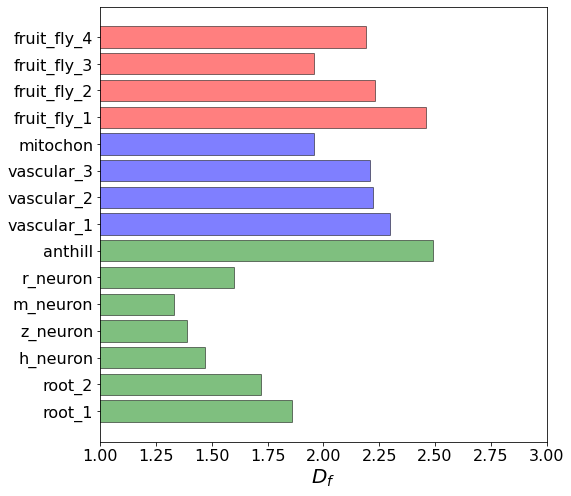

In [86]:
ordered_name_list =['root_1','root_2','human_neuron','zebrafish_neuron','monkey_neuron',
                'rat_neuron','anthill','vascular_1','vascular_2','vascular_3',
                'mitochondrial','fruit_fly_1','fruit_fly_2','fruit_fly_3','fruit_fly_4']
ordered_name_dict = {'tree':['root_1','root_2','human_neuron','zebrafish_neuron','monkey_neuron',
                'rat_neuron','anthill'],'lattice':['vascular_1','vascular_2','vascular_3',
                'mitochondrial'],'linked_tree':['fruit_fly_1','fruit_fly_2','fruit_fly_3','fruit_fly_4']}
plt.figure(figsize=(8,8))
for name in ordered_name_list:
    if name in name_change_dict.keys():
        changed_name = name_change_dict[name]
    else:
        changed_name = name
    if name in ordered_name_dict['tree']:
        plt.barh( changed_name ,df_data[df_data['dataset'] == name]['fractal_dimension'].values[0],alpha=0.5,edgecolor='black',orientation='horizontal',color='green')
    if name in ordered_name_dict['lattice']:            
        plt.barh( changed_name ,df_data[df_data['dataset'] == name]['fractal_dimension'].values[0],alpha=0.5,edgecolor='black',orientation='horizontal',color='blue')
    if name in ordered_name_dict['linked_tree']:            
        plt.barh( changed_name ,df_data[df_data['dataset'] == name]['fractal_dimension'].values[0],alpha=0.5,edgecolor='black',orientation='horizontal',color='red')
    plt.xlim(1,3)
    plt.xlabel('$D_{f}$',fontsize=20)
    #plt.yticks(rotation = 45);
plt.savefig('fractal_dimension.pdf', format='pdf',dpi=1200)

# Density (space-filling) plots

In [74]:
density_dict = {}
for name in name_list:
    infile = open('1. density_results/' + name +'_basic_results.pkl','rb')
    density_dict[name] = pickle.load(infile)

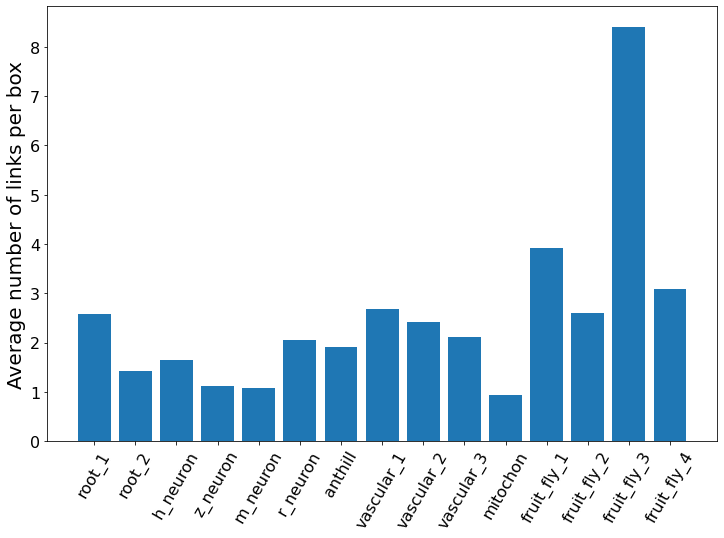

In [130]:
bar_dict = {}
for name in name_list:
    if name in name_change_dict:
        new_name = name_change_dict[name]
    else:
        new_name = name
    if 'fruit_fly' in name:
        bar_dict[new_name ] = np.mean(density_dict[name]['link_density_list'])
    else:
        bar_dict[new_name ] = np.mean(density_dict[name]['link_density_list'])
plt.figure(figsize=(12,8))
plt.bar(bar_dict.keys(),bar_dict.values());
plt.xticks(rotation=60)
plt.ylabel('Average number of links per box')
plt.savefig('n_links_per_box.pdf', format='pdf', dpi=1200)

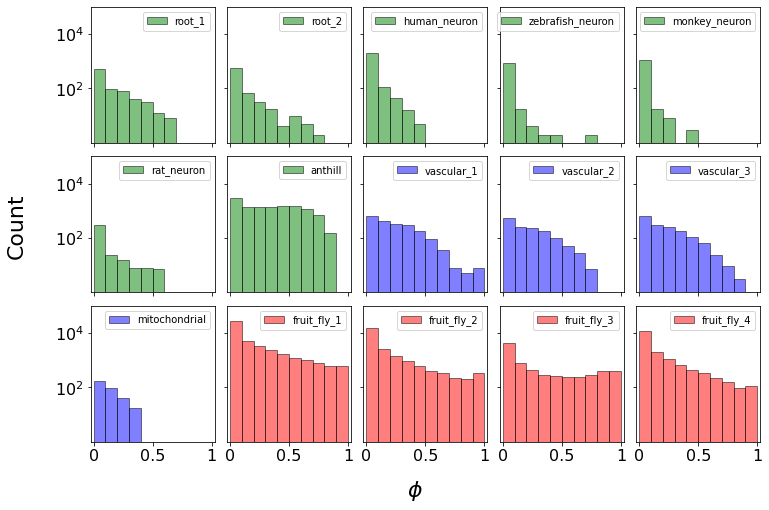

In [80]:
all_densities_dict = {}
for name in name_list:
    all_densities = density_dict[name]['density_list']
    # Adress if nan values exist
    all_densities= np.where(np.isnan(all_densities), 0, all_densities)
    all_densities_dict[name] = np.array(all_densities)

fig, axs = plt.subplots(3, 5, figsize=(12, 8),gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
ij_name_dict = {'root_1':(0,0),'root_2':(0,1),'anthill':(1,1),'zebrafish_neuron':(0,3) ,'monkey_neuron':(0,4)
                ,'rat_neuron':(1,0), 'human_neuron':(0,2),'vascular_1':(1,2),'vascular_2':(1,3),'vascular_3':(1,4)
                ,'mitochondrial':(2,0),'fruit_fly_1':(2,1),'fruit_fly_2':(2,2),'fruit_fly_3':(2,3),'fruit_fly_4':(2,4)}
for name in name_list:
    if name in name_change_dict:
        new_name = name_change_dict[name]
    else:
        new_name = name
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].hist(all_densities_dict[name],color = category_color_dict[name],label=name,alpha=0.5,bins = np.arange(0,1.1,0.1),edgecolor='black')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yscale('log')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticks([0,0.5,1]) 
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticklabels([0,0.5,1])
    
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yticks([100,10000]) 
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xlim(-0.025,1.025)
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_ylim(1,100000)
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].axvline(np.mean(all_densities_dict[name]),color='black',linestyle='dashed')#,label = 'mean')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].legend()
    
for ax in axs.flat:
    ax.label_outer()

fig.text(0.5, 0.04, '$\phi$', ha='center', va='center',fontsize=22)
fig.text(0.04, 0.5, 'Count', ha='center', va='center', rotation='vertical',fontsize=22)

plt.savefig('density_distribution.pdf', format='pdf',dpi=1200)